# Section 4.2. Airy integrals and Taylor series expansions

In [118]:
import sys
import sympy as sp

print("Python version", sys.version)
print("Sympy version", sp.__version__)

from datetime import date

print("Today:", date.today())

Python version 3.9.10 (main, Jan 15 2022, 11:48:00) 
[Clang 13.0.0 (clang-1300.0.29.3)]
Sympy version 1.10.1
Today: 2022-04-04


The current notebook serves several goals.

* Deduce the approximations of the generalised deformed exponent
* Using the assertions, check as much of the intermediate computation steps as possible

In [1]:
#### the following two lines are needed if modifications are made into the libraries
#### on-the-fly.
#
# %load_ext autoreload
# %autoreload 2
#

# Specify the path for the modules
import sys
import os.path as osp
sys.path.append(osp.join(osp.abspath(''), '..', 'lib'))

## 1. Importing trees and unrooted trees

In [2]:
# First of all, we define the necessary variables and symbols

import sympy as sp
sp.init_printing()
z,x,w = sp.symbols('z,x,w')
r = sp.Symbol('r', integer=True)

We use a custom definition for the functions T, U.
In addition, we incorporate the rule $T(z) = z e^{T(z)}$
into a custom function `simplify`.

In [3]:
# We use a custom definition for the functions T, U.
# In addition, we incorporate the rule "T(z) = z e^{T(z)}"
# into a custom function `simplify`

from sp_utils import T, U, simplify

## 2. Verifying Lemma 4.9

### 2.1. The first function: f(x)

The function $f(x)$ is defined as follows:
$$
    f(x) = - \dfrac{x^2}{2w} - z e^{-ix}
$$

In [4]:
f = sp.Lambda(x, -x**2/(2*w) - z * sp.exp(-sp.I * x))
f

$$
    x_0 = i T(zw)
$$

In [5]:
x0 = sp.I * T(z*w)
x0

The next step is to compute Taylor series for $f(x)$ at $x_0$.

**ASSERTION 2.1.**
$$
\boxed{
    f(x_0) = - \dfrac{U(zw)}{w},\
    f''(x_0) = \dfrac{T(zw) - 1}{w},\
    f^{(k)}(x_0) = -(-i)^k \dfrac{T(zw)}{w}
}
$$

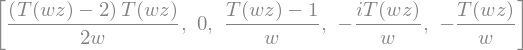

In [6]:
[
    simplify(
        sp.diff(f(x), x, n)
        .subs(x, x0)            
    )
    for n in range(5)
]

In [7]:
assert(                     # Testing the constant term
    simplify(
        sp.diff(f(x), x, 0)
        .subs(x, x0)            
    + U(z*w)/w
    ) == 0)
print("assertion tested for n = 0")

assertion tested for n = 0


In [8]:
assert(                     # Stationary point
    simplify(
        sp.diff(f(x), x, 1)
        .subs(x, x0)) == 0    
)
print("assertion tested for n = 1")

assertion tested for n = 1


In [9]:
assert(                     # Second derivative
    simplify(
        sp.diff(f(x), x, 2)
        .subs(x, x0)
        -
        (T(z*w) - 1)/w
    )
    == 0    
)
print("assertion tested for n = 2")

assertion tested for n = 2


In [10]:
max_N = 20
for n in range(3, max_N + 1):
    assert(                 # All further derivatives for n < max_N
        simplify(
            sp.diff(f(x), x, n)
            .subs(x, x0)
        + (-sp.I)**n * T(z*w)/w
        ) == 0)
print("assertion tested for n = 3..%d" % max_N)

assertion tested for n = 3..20


### 2.2. The second function: h(x)

The function $h(x)$ is defined as follows:
$$
    h(z) = 1 - zw e^{-ix}
$$

In [11]:
h = sp.Lambda(x, 1 - z*w*sp.exp(-sp.I * x))
h

## 3. Part (a)

$$
    t \in [-w^c, w^c],
    \quad
    c \in  (1/3, 1/3 + \varepsilon/2)
$$

**ASSERTION A.1.**
$$
\boxed{
    h(x_0 + t) = 1 - T(zw) e^{-it}
}
$$

In [12]:
t = sp.Symbol('t')
simplify(h(x0 + t))

In [13]:
assert(simplify(
    h(x0 + t)
    - (
        1 - T(z*w) * sp.exp(-sp.I * t)
    )
) == 0)
print("A.1.: assertion tested")

A.1.: assertion tested


**ASSERTION A.2.**
$$
\boxed{
    h(x_0 + t) = 1 - T(zw) e^{-it} = 1 - T(zw) + O(w^c)
}
$$

In [14]:
sp.series(simplify(h(x0 + t)), t, 0, n=1)

In [15]:
assert simplify(h(x0 + t)) - (1 - T(z*w)) in sp.O(t)
print("A.2.: assertion tested")

A.2.: assertion tested


**ASSERTION A.3.**
$$
\boxed{
    f(x_0 + t) = f(x_0) + f''(x_0)\dfrac{t^2}{2} + O(w^{3c-1})
}
$$

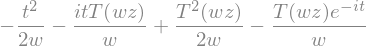

In [16]:
simplify(
    f(x0 + t)
).expand()

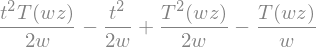

In [17]:
simplify(
    f(x0) + f(x).diff(x,x).subs(x,x0)*t**2/2
).expand()

The difference between $f(x_0 + t)$ and $f(x_0) + f''(x_0)\dfrac{t^2}{2}$ is

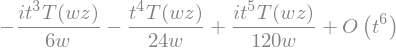

In [18]:
sp.series(
    simplify(
        f(x0 + t)
        -
        (f(x0) + f(x).diff(x,x).subs(x,x0)*t**2/2)
    ).expand(),
    t, 0, n=6
)

where $t = O(w^{c})$. The first non-negligible term gives $O(w^{3c-1})$ and the rest is negligible.

In [19]:
assert sp.series(
    simplify(
        f(x0 + t)
        -
        (f(x0) + f(x).diff(x,x).subs(x,x0)*t**2/2)
    ).expand() * w,
    t, 0, n=6
) in sp.O(t**3)

**ASSERTION A.4.**
$$
\boxed{
    f(x_0 + t) - f(x_0) = -\dfrac{1}{2w} \left(
        t^2 + 2(e^{-it} + it - 1)T(zw)
    \right)
}
$$

In [20]:
assert(simplify(
    f(x0 + t) - f(x0)
    +
    1/(2*w) * (
        t**2 + 2*(sp.exp(-sp.I * t) + sp.I*t - 1) * T(w*z)
    )
) == 0)
print("A.4.: assertion tested")

A.4.: assertion tested


**ASSERTION A.5.**
$$
\boxed{
    \left.\dfrac{d}{dt}\right|_{t=0}
    [f(x_0 + t) - f(x_0)] = 0
}
$$

In [21]:
assert(simplify(
    f(x0 + t) - f(x0)
).diff(t).subs(t, 0) == 0)
print("A.5.: assertion tested")

A.5.: assertion tested


**ASSERTION A.6.**
$$
\boxed{
    \dfrac{d^2}{dt^2} [f(x_0 + t) - f(x_0)] = -w^{-1}(1 - T(zw)e^{-it})
}
$$

In [22]:
assert(
    simplify(
        simplify(
            f(x0 + t) - f(x0)
        ).diff(t, t)
        +
        (1 - T(z*w)*sp.exp(-sp.I * t))/w
    ) == 0
)
print("A.6.: assertion tested")

A.6.: assertion tested


## 4. Part (b)

$$
    \text{Condition 1:}
    \qquad 1 - |T(zw)| \leqslant w^{1/3 - \varepsilon}
$$

$$
    \text{Condition 2:} \qquad
    t \in [-w^c, w^c],
    \quad
    c \in  (1/4, 1/3)
$$

$$
    \text{Condition 3:}
    \qquad
    x_0 = i T(zw)
$$

**ASSERTION B.1.**
$$
\boxed{
    h(x_0+t) = 1 - T(zw) + it +
    O(w^{c+1/3-\varepsilon} + w^{2c})
}
$$

In [23]:
sp.series(simplify(h(x0 + t)), t, 0, n=3)

Here, $t = O(w^c)$.
Furthermore, since
$1 - |T(zw)| \leqslant w^{1/3 - \varepsilon}$,
and
$T(zw) \sim |T(zw)|$,
we have
$$
    itT(zw) = it + it(1 - T(zw)) = it + O(w^{c +1/3 - \varepsilon})
$$
and
$$
    t^2 = O(w^{2c})
$$

**ASSERTION B.2.**
$$
\boxed{
    f(x_0+t) = - \dfrac{U(zw)}{w} -
    \dfrac{1 - T(zw)}{w} \dfrac{t^2}{2} -
    \dfrac{i}{w} \dfrac{t^3}{6} +
    O(w^{3c-\varepsilon-2/3} + w^{4c-с})
}
$$

Here is the exact expression for $f(x_0 + t)$:

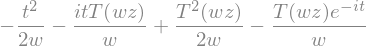

In [24]:
simplify(
    f(x0 + t)
).expand()

After taking the series with respect to $t$, we obtain

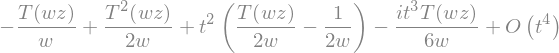

In [25]:
sp.series(
    simplify(
        f(x0 + t)
    ).expand(),
t, 0, n=4)

Finally, we can compute the difference between series expression and the expected expression

In [26]:
(
    sp.series(
        simplify(
            f(x0 + t)
        ).expand(),
    t, 0, n=4) - (
        -U(z*w)/w - (1-T(z*w))/w * t**2/2 - sp.I/w*t**3/6
    )
).simplify()

Since $1 - T(zw) = O(w^{1/3-\varepsilon})$, this yields the error term
$$
    O(w^{3c - 1 + 1/3 - \varepsilon}) + O(w^{4c-1}) = O(w^{3c - 2/3 - \varepsilon} + w^{4c-1}).
$$

**ASSERTION B.3.**
$$
\boxed{
    \int_{-\infty}^\infty
    (1 - T(zw) + it)^r
    e^{-w^{-1} (1 - T(zw))t^2/2 - iw^{-1} t^3/6} dt = -i \int_{\Pi(\pi/2)} t^r e^{p(t)} dt
}
$$
where
$$
\boxed{
    p(t) = \frac{t^3}{6w} -
    \dfrac{t}{2w}(1-T(zw))^2 +
    \dfrac{1}{3w}(1 - T(zw))^3
}
$$

In [27]:
base_expression = 1 - T(z*w) + sp.I * t

The required variable change is a linear substitution

In [28]:
t1 = sp.Symbol('t1')
sp.solve(base_expression.subs(t, t1) - t, t1)

The required variable change is therefore
$$
    t \mapsto it + i (1 - T(zw))
$$

In [29]:
new_t = sp.solve(base_expression.subs(t, t1) - t, t1)[0]
new_t

In [30]:
## Check that the reverse of the substitution gives identity
assert(
    base_expression
    .subs(t, new_t)
    .simplify()
    == t
)
print("reverse substitution gives identity: assertion tested")

reverse substitution gives identity: assertion tested


We also need to take into account the variable change under the integral

In [31]:
new_dt = new_t.diff(t)
new_dt

Next, we transform the expression in the exponent

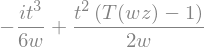

In [32]:
pow_exp = - (1-T(z*w))/w * t**2/2 - sp.I/w * t**3 / 6
pow_exp

If we expand the brackets after the variable substitution, the quadratic term (magically) disappears

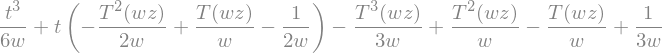

In [33]:
(
    pow_exp
    .subs(t, new_t)
    .expand()
    .collect(t)
)

In [34]:
assert((
    pow_exp
    .subs(t, new_t)
    .expand()
    .collect(t)
    -
    (
        t**3/(6*w)
        - t * (1 - T(z*w))**2 / (2*w)
        + (1 - T(z*w))**3 / (3*w)
    )
).simplify() == 0)
print("B.3.: assertion tested")

B.3.: assertion tested


**ASSERTION B.4.**

Let
$$
\boxed{
LHS := 
    \dfrac{1}{\sqrt{2 \pi w}}
    e^{-U(zw)/w}
    \int_{-\infty}^\infty
    (1 - T(zw) + it)^r
    e^{-w^{-1} (1 - T(zw))t^2/2 - iw^{-1} t^3/6}
    dt
}
$$
and
$$
\boxed{
    RHS :=
    (-1)^r \sqrt{2 \pi}
    \cdot
    2^{r/3 + 1/3}
    w^{r/3 - 1/6}
    \mathrm{Ai}(r; 2^{-2/3} \theta^2)
    e^{\theta^3/3 - U(zw)/w}
}
$$
where
$$
    \theta = w^{-1/3} (1 - T(zw)).
$$
Then,
$$
\boxed{
    LHS = RHS.
}
$$

We will deliberately ignore the integration symbol in the symbolic computation because the correctness of the contour replacement is guaranteed by the fact that $ \mathrm{Re}(1 - T(zw)) > 0 $. We need to keep in mind that we are dealing with differential forms, and therefore, each variable change should be followed by a transformation of `dt`.

Next, we will use a previous simplification from the variable change. It more convenient to test the base and the power of the exponent separately.

In [35]:
p = (
    t**3/(6*w)
    - t * (1 - T(z*w))**2 / (2*w)
    + (1 - T(z*w))**3 / (3*w)
)

In [36]:
base_Left_HS = (
    1
    / sp.sqrt(2 * sp.pi * w)
    * t**r
) * new_dt
exp_Left_HS = p - U(z*w)/w

The declared variable change is $t \mapsto 2^{1/3} w^{1/3} t$. We can apply it to LHS and obtain

In [37]:
next_t = t * 2**sp.Rational(1,3) * w**sp.Rational(1,3)
next_dt = next_t.diff(t)

In [38]:
base_Left_HS = base_Left_HS.subs(t, next_t) * next_dt
exp_Left_HS = exp_Left_HS.subs(t, next_t)

$$
    \mathrm{Ai}(r; z) := \dfrac{(-1)^r}{2 \pi i}
    \int_{z \in \Pi} t^r e^{-zt + t^3/3} dt
$$

Here, $r$ will be a `sympy` symbol, and not an argument of the function. This is required to ensure a symbolic equivalence between the expressions.

In [39]:
Ai_base = sp.Lambda(z,
    (-1)**r
    / (2 * sp.pi * sp. I)
    * t**r
)
Ai_exp = sp.Lambda(z, -z*t + t**3/3)

In [40]:
theta = (1 - T(z*w)) * w**sp.Rational(-1,3)
theta

In [41]:
exp_Right_HS = (
    theta**3/3
    - U(z*w)/w
    + Ai_exp(theta**2 * 2**sp.Rational(-2,3))
)
base_Right_HS = (
    (-1)**r
    * sp.sqrt(2 * sp.pi)
    * 2**(r/3+ sp.Rational(1,3))
    * w**(r/3 - sp.Rational(1,6))
    * Ai_base(theta**2 * 2**sp.Rational(-2,3))
)

In [42]:
assert(
    (base_Left_HS / base_Right_HS).simplify() == 1
)
print("B.4. Base part identical: assertion tested")

B.4. Base part identical: assertion tested


In [43]:
assert(
    (exp_Left_HS - exp_Right_HS).simplify() == 0
)
print("B.4. Exponent part identical: assertion tested")

B.4. Exponent part identical: assertion tested


## 5. Part (c)

Due to how error terms are implemented in `sympy`, it does not seem everywhere possible to automatise the check of the error terms. Therefore, it will need some human interaction with `sympy` outputs.

$$
    \text{Condition 1:}
    \qquad
    c \in (1/4, 1/3)
$$
$$
    \text{Condition 2:}
    \qquad
    1 - ezw = \tau w^{2/3}
$$

$$
    x(t) := i(1 - t (2w)^{1/3})
$$

In [44]:
x_of_t = sp.I*(1 - t * (2*w)**sp.Rational(1,3))

**ASSERTION C.1.**
$$
\boxed{
    h(x(t)) = 2^{1/3} w^{1/3} t + O(|t|^2 w^{2/3})
}
$$

Here is the (presumed) series expansion of $h(x(t))$ when $t$ is small. In fact, $t$ might go to infinity, so we need to change our strategy in the sequel to produce a more reliable verification.

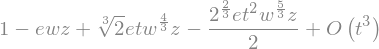

In [45]:
sp.series(
    h(x_of_t), t, 0, n=3
)

Since $ezw \sim 1$, the second term is $O(|t|^2 w^{2/3})$. Note that $tw^{1/3}$ tends to zero, which allows to justify the Taylor expansion.

Further simplification uses the fact that $ \tau = O(1) $, $ t = O(w^{c-1/3})$ and that $t$ is separated from zero.

First, we substitute $t \mapsto \widehat tw^{-1/3}$ and use the expansion when $t$ is small.

In [46]:
t_hat = sp.Symbol('\hat t')

In [47]:
sp.series(
    h(x_of_t).subs(t, t_hat * w**sp.Rational(-1,3)),
    t_hat, 0, n=3
)

Here, we use $z = (1 - \tau w^{2/3}) / (ew)$

In [48]:
tau = sp.Symbol('tau')
z_from_part_c = (1 - tau * w**sp.Rational(2,3)) / (sp.E * w)

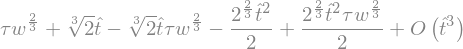

In [49]:
sp.series(
    h(x_of_t).subs(t, t_hat * w**sp.Rational(-1,3)),
    t_hat, 0, n=3
).subs(z, z_from_part_c).expand()

We see that truncation at $\widehat t^2$ does not cause any extra constant multiple. Now, both $\widehat t$ and $w$ are small, and we can substitute $\tau = O(1)$.

In [50]:
(
    sp.series(
        h(x_of_t).subs(t, t_hat * w**sp.Rational(-1,3)),
        t_hat, 0, n=3
    ).subs(z, z_from_part_c)
    .subs(tau, sp.O(1, (t_hat, 0), (w, 0)))
    .expand()
)

Finally, we substitute back $\widehat t \mapsto t w^{1/3}$.
Since $t$ is separated from zero, we have, in addition,
$w^{2/3} = O(|t|^2w^{2/3})$. Moreover, $ c < 1/3 $ justifies the expansion.

We can formally certify that
$$
    h(x(t)) = 2^{1/3} w^{1/3} t + \mathcal O(|t|^2 w^{2/3} + w^{2/3})
$$
since anyway $w^{2/3} = \mathcal O(|t|^2 w^{2/3})$.

In [51]:
h_of_t_part_C1 = (
    sp.series(
        h(x_of_t)         ## The central expression, before substitutions
        .subs(t, t_hat * w**sp.Rational(-1,3)),
        t_hat, 0, n=3
    ).subs(z, z_from_part_c)
    .subs(tau, sp.O(1, (t_hat, 0), (w, 0)))
    .expand()
)
assert (
    h_of_t_part_C1 - 2**sp.Rational(1,3) * t_hat
) in sp.O(t_hat**2 + w**sp.Rational(2,3))
print("C.1.: assertion tested")

C.1.: assertion tested


**ASSERTION C.2.**
$$
\boxed{
\begin{cases}
    f(i) &= - \dfrac{1}{2w} + \dfrac{\tau}{w^{1/3}} \\
    f'(i) &= -i \tau w^{-1/3} \\
    f''(i) &= - \tau w^{-1/3} \\
    f'''(i) &= -iez = -i/w + i \tau w^{-1/3} \\
    f^{(4)}(i) &= -ez = -1/w + \tau w^{-1/3} \\
    f^{(5)}(i) &= O(1/w)
\end{cases}
}
$$

In [52]:
table_of_diff_f_of_i = [
    -1/(2*w) + tau * w**sp.Rational(-1,3),    # f(i)
    -sp.I * tau * w**sp.Rational(-1,3),       # f'(i)
    -tau * w**sp.Rational(-1,3),              # f''(i)
    -sp.I / w + sp.I * tau * w**sp.Rational(-1,3),
    -1/w + tau * w**sp.Rational(-1,3)
]
for n in range(5):
    assert(simplify(
        sp.diff(f(x), x, n)
        .subs(x, sp.I)
        .subs(z, z_from_part_c)
        - table_of_diff_f_of_i[n]
    ) == 0)
    print("d^%d/dx^%d f(i) == %s: assertion tested" % (n, n, table_of_diff_f_of_i[n]))

print("----------------")
print("d^%d/dx^%d f(i) == %s" % (5, 5, sp.diff(f(x), x, 5)
        .subs(x, sp.I)
        .subs(z, z_from_part_c)))
assert(sp.diff(f(x), x, n)
        .subs(x, sp.I)
        .subs(z, z_from_part_c) in sp.O(1/w))
print("d^%d/dx^%d f(i) == O(1/w): assertion tested" % (5, 5))

d^0/dx^0 f(i) == tau/w**(1/3) - 1/(2*w): assertion tested
d^1/dx^1 f(i) == -I*tau/w**(1/3): assertion tested
d^2/dx^2 f(i) == -tau/w**(1/3): assertion tested
d^3/dx^3 f(i) == I*tau/w**(1/3) - I/w: assertion tested
d^4/dx^4 f(i) == tau/w**(1/3) - 1/w: assertion tested
----------------
d^5/dx^5 f(i) == I*(-tau*w**(2/3) + 1)/w
d^5/dx^5 f(i) == O(1/w): assertion tested


**ASSERTION C.3.**
$$
\boxed{
    e^{f(x)} = (1 + O(w^{4c-1})) e^{f(i)}
    \cdot e^{-2^{1/3} \tau t + t^3/3}
}
$$
Here, in fact, we want to show that
$$
\boxed{
    e^{f(x)} = (1 + O(w^{2c-1/3} + w^{4c-1})) e^{f(i)}
    \cdot e^{-2^{1/3} \tau t + t^3/3}
}
$$
but there is also an inequality $2c-1/3 > 4c - 1$ for $c < 1/3$.
It is more convenient to rewrite these error terms explicitly in terms of $t$ and $w$.

Again, we substitute $t \mapsto \widehat tw^{-1/3}$ to use the expansion when $t$ is small.

In [53]:
# Asymptotic expansion of the exponent e^{f(x)}
(
    sp.series(
        f(x_of_t).subs(t, t_hat * w**sp.Rational(-1,3)),
        t_hat, 0, n=6
    ).subs(z, z_from_part_c)
    .expand()
)

First of all, the terms
$$  - \dfrac{1}{2w} + \dfrac{\tau}{\sqrt[3]{w}} -
    \dfrac{\sqrt[3]{2} \widehat t \tau}{\sqrt[3]{w}} +
    \dfrac{\widehat t^3}{3w} $$
are already present in the final expression, and everything else is supposed to be the error term fitting inside $O(w^{4c-1})$.

The two error terms with the highest possible contributions are $O(\widehat t^2 w^{-1/3})$ and $O(\widehat t^4 w^{-1})$.
Since $c > 1/4$ and $\widehat t = O(w^c)$, we have
$$
    O(\widehat t^2 w^{-1/3}) = O(w^{2c-1/3}) \to 0,
$$
and
$$
    O(\widehat t^4 w^{-1}) = O(w^{4c-1}) \to 0.
$$
Moreover, $4c-1$ is the smallest among all the exponents.

In [54]:
### Asymptotic expansion of the exponent

assert (
    sp.series(                 # specify the difference between the terms in the exponent
        (f(x_of_t) - f(sp.I) + 2**sp.Rational(1,3)* tau * t - t**3/3)
        .subs(t, t_hat * w**sp.Rational(-1,3)),
        t_hat, 0, n=6
    ).subs(z, z_from_part_c)
    .expand()                  # and the error term
) in sp.O(t_hat**4/w + t_hat**2 * w**sp.Rational(-1,3))
print("C.3.: assertion tested")

C.3.: assertion tested


**ASSERTION C.4.**
$$
\boxed{
    e^{f(x)} = e^{f(i) - 2^{1/3} \tau t + t^3/3}
    \Big(
        1 + w^{1/3}(\zeta_2 t^2 + \zeta_4 t^4) + w^{2/3} E(w, t)
    \Big)
}
$$
where
$$
    \zeta_2 = 2^{-1/3} \tau
    \quad \text{and} \quad
    \zeta_4 = -\frac{2^{1/3}}{12}.
$$

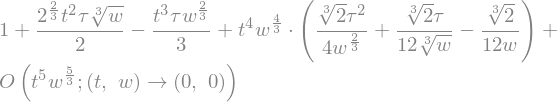

In [55]:
sp.series(sp.exp(
    sp.series(
        f(x_of_t).subs(t, t_hat * w**sp.Rational(-1,3)),
        t_hat, 0, n=5
    ).subs(z, z_from_part_c)
    .expand()
    -
    (
        -1/(2*w)
        + tau * w**sp.Rational(-1, 3)
        - 2**sp.Rational(1,3) * t_hat * tau * w**sp.Rational(-1,3)
        + t_hat**3 / 3 / w
    )
), t_hat, 0, n=5).subs(t_hat, t * w**sp.Rational(1,3))

Note that the error terms are not rigorous and not correct here, we are aiming for the respective coefficients only.

* The term $2^{-1/3} \tau t^2 w^{1/3}$ becomes $\zeta_2 t^2 w^{1/3}$
* The term $-\frac{1}{12} t^4 w^{1/3}$ becomes $\zeta_4 t^4 w^{1/3}$
* Everything else goes to $w^{2/3} E(w, t)$.

**ASSERTION C.5.** (REFINED C.1).
$$
\boxed{
    h(x) = 2^{1/3} t w^{1/3} - 2^{-1/3} t^2 w^{2/3} + \tau w^{2/3} + O(|t|^3 w)
}
$$

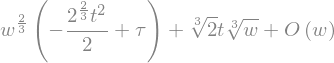

In [56]:
sp.series(
    h(x_of_t).subs(z, z_from_part_c),
    w, 0, n=1
).expand().collect(w)

The error term in $O(w)$ is bounded by $O(t^3 w)$:

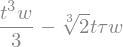

In [57]:
sp.series(
    h(x_of_t).subs(z, z_from_part_c)
    -
    (
        2**sp.Rational(1,3) * t * w**sp.Rational(1,3)
        - 2**sp.Rational(-1,3) * t**2 * w**sp.Rational(2,3)
        + tau * w**sp.Rational(2,3)
    )
    ,
    w, 0, n=2
).expand().collect(w).as_leading_term(w).expand()

In [58]:
assert sp.series(
    (h(x_of_t).subs(z, z_from_part_c) - (
        2**sp.Rational(1,3) * t * w**sp.Rational(1,3)
        - 2**sp.Rational(-1,3) * t**2 * w**sp.Rational(2,3)
        + tau * w**sp.Rational(2,3)
    )).subs(t, t_hat * w**sp.Rational(-1,3)), t_hat, 0) in sp.O(t_hat * w**sp.Rational(2,3) + t_hat**3)
print("C.5.: assertion tested")

C.5.: assertion tested


**ASSERTION C.6.**

Let
$$
\boxed{
    I_0 = \int (F(1) - F'(1) h(x)) e^{f(i) - 2^{1/3} \tau t + t^3/3}
    \left(
        1 + w^{1/3}(\zeta_2 t^2 + \zeta_4 t^4)
    \right) dx
}
$$
Then
$$
\boxed{
    I_0 = e^{f(i)}(C_{01} w^{1/3} + C_{02} w^{2/3} + O(w))
}
$$
where
$$
\boxed{
    C_{01} = 2^{4/3} \pi \mathrm{Ai}(2^{1/3} \tau) F(1)
}
$$
and
$$
\boxed{
    C_{02} = 2\pi F(1) \Big(
        \tau \mathrm{Ai}(2; 2^{1/3} \tau) -
        \dfrac{2^{2/3}}{12} \mathrm{Ai}(4; 2^{1/3} \tau)
    \Big) + 2^{5/3} \pi F'(1) \mathrm{Ai}(1; 2^{1/3} \tau)
}
$$

In [59]:
QQ = sp.Rational

In [60]:
del(Ai_base)
del(Ai_exp)

$$
    \mathrm{Ai}(r; z) := \dfrac{(-1)^r}{2 \pi i}
    \int_{z \in \Pi} t^r e^{-zt + t^3/3} dt
$$

In [61]:
Ai_base = sp.Lambda((r, z),
    (-1)**r
    / (2 * sp.pi * sp. I)
    * t**r
)
Ai_exp = sp.Lambda((r, z), -z*t + t**3/3)
Ai = sp.Lambda((r, z), Ai_base(r, z) * sp.exp(Ai_exp(r, z)))

First of all, it is much more convenient to define $y = w^{1/3}$ to avoid dealing with fractional powers of $w$. Then, we make the required substitutions in $h(x), f(x)$ and $x(t)$.

In [62]:
y = sp.Symbol('y', positive=True)
F = sp.Function('F')
F1 = sp.Function("F'")

$$
    z := (1 - \tau w^{2/3}) / (ew)
$$

In [63]:
z_from_part_c = (1 - tau * y**2) / (sp.E * y**3)

$$
    x(t) := i(1 - t (2w)^{1/3})
$$

In [64]:
x_of_t = sp.I*(1 - t * 2**sp.Rational(1,3) * y)

$$
    f(x) = - \dfrac{x^2}{2w} - z e^{-ix}
$$

In [65]:
f = sp.Lambda(x,
    - x**2 / (2 * y**3)
    - z_from_part_c * sp.exp(-sp.I * x))

$$
    h(z) = 1 - zw e^{-ix}
$$

In [66]:
h = sp.Lambda(x, 1 - z_from_part_c * y**3 * sp.exp(-sp.I * x))

$$
    \zeta_2 = 2^{-1/3} \tau
    \quad \text{and} \quad
    \zeta_4 = -\frac{2^{1/3}}{12}.
$$

In [67]:
zeta2 = 2**QQ(-1,3) * tau
zeta4 = - 2**QQ(1,3) / 12

$$
    dx(t) = x'(t) dt
$$

In [68]:
dx_of_t = sp.diff(x_of_t, t)

$$
    I_0 = \int (F(1) - F'(1) h(x)) e^{f(i) - 2^{1/3} \tau t + t^3/3}
    \left(
        1 + w^{1/3}(\zeta_2 t^2 + \zeta_4 t^4)
    \right) dx
$$

In [69]:
I0_base = (
    (F(1) - F1(1) * h(x_of_t))
    * (1 + y * (zeta2 * t**2 + zeta4 * t**4))
    * dx_of_t
)
I0_exp = f(sp.I) - 2**QQ(1,3) * tau * t + t**3/3
I0 = I0_base * sp.exp(I0_exp)

$$
    C_{01} = 2^{4/3} \pi \mathrm{Ai}(2^{1/3} \tau) F(1)
$$

In [70]:
C01_base = (
    2**QQ(4,3)
    * sp.pi
    * Ai_base(0, 2**QQ(1,3) * tau)
    * F(1)
)

$$
    C_{02} = 2\pi F(1) \Big(
        \tau \mathrm{Ai}(2; 2^{1/3} \tau)
        - \dfrac{2^{2/3}}{12} \mathrm{Ai}(4; 2^{1/3} \tau)
    \Big)
    + 2^{5/3} \pi F'(1) \mathrm{Ai}(1; 2^{1/3} \tau)
$$

In [71]:
C02_base = 2 * sp.pi * F(1) * (
    tau * Ai_base(2, 2**QQ(1,3) * tau)
    - 2**QQ(2,3)/12 * Ai_base(4, 2**QQ(1,3) * tau)
) + 2**QQ(5,3) * sp.pi * F1(1) * Ai_base(1, 2**QQ(1,3) * tau)

The exponential parts of $C_k$ and $I_n$ are all identical, so we will not check them.

In [72]:
sp.series(
    simplify(I0_base - (C01_base * y + C02_base * y**2)),
    y, 0, n=3
)

In [73]:
assert(
    sp.series(
        simplify(I0_base - (C01_base * y + C02_base * y**2)),
        y, 0, n=3
    ).removeO() == 0
)
print("C.6.: assertion tested")

C.6.: assertion tested


**ASSERTION C.7.**

Let
$$
\boxed{
    I_1 = \int (F(1)h(x) - F'(1) h^2(x)) e^{f(i) - 2^{1/3} \tau t + t^3/3}
    \left(
        1 + w^{1/3}(\zeta_2 t^2 + \zeta_4 t^4)
    \right) dx
}
$$
Then
$$
\boxed{
    I_1 = e^{f(i)}(C_{12} w^{1/3} + C_{13} w^{2/3} + O(w))
}
$$
where
$$
\boxed{
    C_{12} = -2^{5/3} \pi \mathrm{Ai}(1; 2^{1/3} \tau) F(1)
}
$$
and
$$
\boxed{
    C_{13} = 2\pi F(1) \Big(
        2^{1/3} \tau \mathrm{Ai}(2^{1/3} \tau) -
        2^{1/3} \tau \mathrm{Ai}(3; 2^{1/3} \tau) -
        \mathrm{Ai}(2; 2^{1/3} \tau) +
        \tfrac{1}{6} \mathrm{Ai}(5; 2^{1/3} \tau)
    \Big) - 4 \pi F'(1) \mathrm{Ai}(2; 2^{1/3} \tau)
}
$$

In [74]:
I1_base = (
    (F(1) * h(x_of_t) - F1(1) * h(x_of_t)**2)
    * (1 + y * (zeta2 * t**2 + zeta4 * t**4))
    * dx_of_t
)

In [75]:
C12_base = (
    -2**QQ(5,3)
    * sp.pi
    * Ai_base(1, 2**QQ(1,3) * tau)
    * F(1)
)

In [76]:
C13_base = (
    2 * sp.pi * F(1) * (
        2**QQ(1,3) * tau * Ai_base(0, 2**QQ(1,3) * tau)
        - 2**QQ(1,3) * tau * Ai_base(3, 2**QQ(1,3) * tau)
        - Ai_base(2, 2**QQ(1,3) * tau)
        + Ai_base(5, 2**QQ(1,3) * tau)/6
    )
    - 4 * sp.pi * F1(1) * Ai_base(2, 2**QQ(1,3) * tau)
)

In [77]:
sp.series(
    simplify(I1_base - (C12_base * y**2 + C13_base * y**3)),
    y, 0, n=4
)

In [78]:
assert(
    sp.series(
        simplify(I1_base - (C12_base * y**2 + C13_base * y**3)),
        y, 0, n=4
    ).removeO() == 0
)
print("C.7.: assertion tested")

C.7.: assertion tested


**ASSERTION C.8.**

$$
\boxed{
    C_{02} = 
    2 \pi \left(
        \frac{5}{6} \tau^2 2^{1/3} F(1) \mathrm{Ai}(2^{1/3}\tau)
        - \frac{1}{6} 2^{2/3} F(1) \mathrm{Ai}'(2^{1/3}\tau)
        + 2^{2/3} F'(1) \mathrm{Ai}'(2^{1/3}\tau)
    \right)
}
$$
and
$$
\boxed{
    C_{13} = - 2 \pi \left(
    \frac{1}{3}( F(1) + 6 F'(1)) 2^{1/3} \tau
    \mathrm{Ai}(2^{1/3} \tau)
    +
    \frac{5}{6} F(1) 2^{2/3} \tau^2 \mathrm{Ai}'(2^{1/3}\tau)
\right)
}
$$

In [79]:
del(Ai)

In [80]:
Ai = sp.Function('Ai')
Ai1 = sp.Function("Ai'")

In [81]:
def Ai_generalised(r, z):
    """For the purposes of the current draft, we only consider
    generalised Airy function with non-negative derivative index.
    
    If r > 2, we use the simplification rule
    Ai(k+3) = (k+1) Ai(k) + z Ai(k+1)
    """
    assert(r >= 0)
    if r == 0:
        return Ai(z)
    if r == 1:
        return Ai1(z)
    if r == 2:
        return z * Ai(z)
    k = r - 3
    return simplify(
        (k+1) * Ai_generalised(k, z)
        + z * Ai_generalised(k+1, z)
    ).expand()

In [82]:
for n in range(6):
    print("Ai(%d; z) = "%n, Ai_generalised(n, z))

Ai(0; z) =  Ai(z)
Ai(1; z) =  Ai'(z)
Ai(2; z) =  z*Ai(z)
Ai(3; z) =  z*Ai'(z) + Ai(z)
Ai(4; z) =  z**2*Ai(z) + 2*Ai'(z)
Ai(5; z) =  z**2*Ai'(z) + 4*z*Ai(z)


In [83]:
# Copy-pasted from Assertion C.6., replaced Ai_base with Ai_generalised
C02_simplified = simplify(
    2 * sp.pi * F(1) * (
        tau * Ai_generalised(2, 2**QQ(1,3) * tau)
        - 2**QQ(2,3)/12 * Ai_generalised(4, 2**QQ(1,3) * tau)
    )
    + 2**QQ(5,3) * sp.pi * F1(1) * Ai_generalised(1, 2**QQ(1,3) * tau)
)

$$
    2 \pi \left(
        \frac{5}{6} \tau^2 2^{1/3} F(1) \mathrm{Ai}(2^{1/3}\tau)
        - \frac{1}{6} 2^{2/3} F(1) \mathrm{Ai}'(2^{1/3}\tau)
        + 2^{2/3} F'(1) \mathrm{Ai}'(2^{1/3}\tau)
    \right)
$$

In [84]:
C02_expected = 2 * sp.pi * (
    QQ(5,6) * tau**2 * 2**QQ(1,3) * F(1) * Ai_generalised(0, 2**QQ(1,3)*tau)
    - QQ(1,6) * 2**QQ(2,3) * F(1) * Ai_generalised(1, 2**QQ(1,3)*tau)
    + 2**QQ(2,3) * F1(1) * Ai_generalised(1, 2**QQ(1,3)*tau)
)

In [85]:
assert (C02_simplified - C02_expected).simplify() == 0
print("C02 is correct: assertion verified")

C02 is correct: assertion verified


In [86]:
# Copy-pasted from Assertion C.7., replaced Ai_base with Ai_generalised
C13_simplified = simplify(
    2 * sp.pi * F(1) * (
        2**QQ(1,3) * tau * Ai_generalised(0, 2**QQ(1,3) * tau)
        - 2**QQ(1,3) * tau * Ai_generalised(3, 2**QQ(1,3) * tau)
        - Ai_generalised(2, 2**QQ(1,3) * tau)
        + Ai_generalised(5, 2**QQ(1,3) * tau)/6
    )
    - 4 * sp.pi * F1(1) * Ai_generalised(2, 2**QQ(1,3) * tau)
)

In [87]:
C13_expected = - 2 * sp.pi * (
    QQ(1,3) * ( F(1) + 6 * F1(1)) * 2**QQ(1,3) * tau * Ai_generalised(0, 2**QQ(1,3) * tau)
    + QQ(5,6) * F(1) * 2**QQ(2,3) * tau**2 * Ai_generalised(1, 2**QQ(1,3) * tau)
)

In [88]:
assert (C13_simplified - C13_expected).simplify() == 0
print("C13 is correct: assertion verified")

C13 is correct: assertion verified


In [89]:
assert (C02_simplified - C02_expected).simplify() == 0
assert (C13_simplified - C13_expected).simplify() == 0
print("C.8.: assertion tested")

C.8.: assertion tested


**ASSERTION C.9.**

Finally, we can check that the expressions for $K_0(\tau)$ and $K_1(\tau)$ in the statement of the theorem are indeed correct.

$$
\boxed{
\begin{align*}
    K_0(\tau) = &
        F(1) \mathrm{Ai}(2^{1/3} \tau)
        + \\
        & w^{1/3}
        \left(
            \tfrac{5}{6} \tau^2 F(1) \mathrm{Ai}(2^{1/3}\tau)
            - \tfrac{1}{6} 2^{1/3} F(1) \mathrm{Ai}'(2^{1/3}\tau)
            + 2^{1/3} F'(1) \mathrm{Ai}'(2^{1/3}\tau)
        \right) + \mathcal O(w^{2/3}) \, ,
          \\
    K_1(\tau) = &
        F(1) \mathrm{Ai}'(2^{1/3} \tau)
        + \\
        & w^{1/3}
        \left(
            \tfrac{1}{3}( F(1) + 6 F'(1)) 2^{-1/3} \tau
            \mathrm{Ai}(2^{1/3} \tau)
            +
            \tfrac{5}{6} F(1) \tau^2 \mathrm{Ai}'(2^{1/3}\tau)
        \right) + \mathcal O(w^{2/3}) \, .
\end{align*}
}
$$


In [90]:
K0 = (
    F(1) * Ai_generalised(0, 2**QQ(1,3)*tau) +
    y * (
        QQ(5,6) * tau**2 * F(1) * Ai_generalised(0, 2**QQ(1,3) * tau)
        - QQ(1,6) * 2**QQ(1,3) * F(1) * Ai_generalised(1, 2**QQ(1,3) * tau)
        + 2**QQ(1,3)* F1(1) * Ai_generalised(1, 2**QQ(1,3) * tau)
    )
)

K1 = (
    F(1) * Ai_generalised(1, 2**QQ(1,3)*tau) +
    y * (
        QQ(1,3) * (F(1) + 6*F1(1)) * 2**QQ(-1,3) * tau * Ai_generalised(0, 2**QQ(1,3) * tau)
        + QQ(5,6) * F(1) * tau**2 * Ai_generalised(1, 2**QQ(1,3) * tau)
    )
)

Recall the expected theorem statement and the intermediate estimates
$$
\psi_r \sim (-1)^r \sqrt{2 \pi} 2^{r/3+1/3} w^{r/3-1/6} K_r(\tau)
\exp \left(
    {- \dfrac{1}{2w} + \dfrac{\tau}{w^{1/3}}}
\right)
$$
$$
\psi_0 \sim \dfrac{1}{\sqrt{2 \pi w}} e^{f(i)} \left(
    C_{01} w^{1/3} + C_{02} w^{2/3} + \ldots
\right)
$$
$$
\psi_1 \sim \dfrac{1}{\sqrt{2 \pi w}} e^{f(i)} \left(
    C_{12} w^{2/3} + C_{13} w + \ldots
\right)
$$

We can immediately test that the exponential parts coincide and focus on the rest

In [91]:
assert (-1 / (2 * y**3) + tau / y - f(sp.I)).simplify() == 0
print("Exponential parts coincide: assertion tested")

Exponential parts coincide: assertion tested


Another simple arithmetic exercise is to test that the leading powers in $w$ are chosen correctly

In [92]:
w_in_psi = y**(r - QQ(1,2))
w_in_psi_0 = y / sp.sqrt(y**3)
w_in_psi_1 = y**2 / sp.sqrt(y**3)
assert(w_in_psi.subs(r, 0) / w_in_psi_0 == 1)
assert(w_in_psi.subs(r, 1) / w_in_psi_1 == 1)
print("Powers in w are correct: assertion tested")

Powers in w are correct: assertion tested


In [93]:
psi_base = (-1)**r * sp.sqrt(2 * sp.pi) * 2**(r/3+QQ(1,3))
psi0_main = psi_base.subs(r,0) * K0
psi1_main = psi_base.subs(r,1) * K1

In [94]:
C01_simplified = (
    2**QQ(4,3)
    * sp.pi
    * Ai_generalised(0, 2**QQ(1,3) * tau)
    * F(1)
)

In [95]:
C12_simplified = (
    -2**QQ(5,3)
    * sp.pi
    * Ai_generalised(1, 2**QQ(1,3) * tau)
    * F(1)
)

In [96]:
assert ((C01_simplified + C02_simplified * y) / sp.sqrt(2 * sp.pi) - psi0_main).simplify() == 0
assert sp.simplify(2**QQ(-1,3) / (2 * sp.pi) * (C01_simplified + y*C02_simplified) - K0) == 0
print("K0 is correct: assertion tested")

K0 is correct: assertion tested


In [97]:
assert ((C12_simplified + C13_simplified * y) / sp.sqrt(2 * sp.pi) - psi1_main).simplify() == 0
assert sp.simplify(-2**QQ(-2,3) / (2 * sp.pi) * (C12_simplified + y*C13_simplified) - K1) == 0
print("K1 is correct: assertion tested")

K1 is correct: assertion tested


## Tail estimates for Part (c)

In [98]:
del(y)
del(w)
del(z_from_part_c)
del(f)
del(t)
del(tau)

**ASSERTION T.1.**

$$
\boxed{
    f(t) = - \dfrac{1}{2 w} \left(
        t^2 + 2 e^{-it - 1} + O(w^{2/3})
    \right)
}
$$
Note that we replaced $w^{1/3}$ by $y$ for convenience of taking the power series.
We also force some of the symbols to be real to simplify taking the real and imaginary part.
We need to change `tau` to be a linear combination of its real and imaginary part.
$$
    \tau = a + i b
$$

In [99]:
y = sp.Symbol('y', real=True)
w = sp.Symbol('w')
t = sp.Symbol('t', real=True)
a,b = sp.symbols('a,b', real=True)
tau = a + sp.I * b

In [100]:
z_from_part_c = (1 - tau * y**2) / (sp.E * y**3)

In [101]:
f = sp.Lambda(x,
    - x**2 / (2 * y**3)
    - z_from_part_c * sp.exp(-sp.I * x))

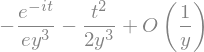

In [102]:
sp.series(f(t), y, 0, n=-1).expand()

In [103]:
assert simplify(
    sp.series(f(t), y, 0, n=6)
    + 1/(2*y**3) * (t**2 + 2 * sp.exp(-sp.I*t-1))
) in sp.O(y**(-1))
print("T.1.: assertion tested")

T.1.: assertion tested


**ASSERTION T.2.**

$$
\boxed{
    \mathrm{Re}(f(i + t e^{-i \pi/6}) - f(i)) =
    w^{-1} \left(
        h_1(t) -
        a w^{2/3} h_2(t) -
        b w^{2/3} h_3(t)
    \right)
}
$$
where
$$
    h_1(t) = 1 - \frac{t^2}{4} - \frac{t}{2} - \cos(\sqrt 3 t/2)
    e^{-t/2}
$$
$$
    h_2(t) = 1 - \cos( \sqrt 3 t/2) e^{-t/2}
$$
$$
    h_3(t) = - \sin( \sqrt 3 t / 2) e^{-t/2}
$$

In [104]:
# real part of f(i + t exp(-i pi/6)) - f(i)
sp.re(simplify(f(sp.I + t * sp.exp(-sp.I * sp.pi / 6)) - f(sp.I)))

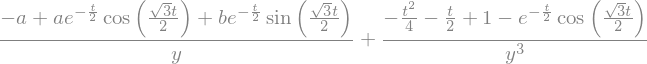

In [105]:
# collecting the terms with respect to y
sp.re(
    simplify(f(sp.I + t * sp.exp(-sp.I * sp.pi / 6)) - f(sp.I))
).collect(y)

In [106]:
LHS = sp.re(
    simplify(f(sp.I + t * sp.exp(-sp.I * sp.pi / 6)) - f(sp.I))
).collect(y)
h1 = LHS.coeff(1/y**3)
h2 = -LHS.coeff(1/y).collect(a).coeff(a)
h3 = -LHS.coeff(1/y).collect(b).coeff(b)

In [107]:
h1

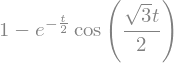

In [108]:
h2

In [109]:
h3

In [110]:
assert h1 == 1 - t**2/4 - t/2 - sp.cos(sp.sqrt(3)*t/2) * sp.exp(-t/2)
assert h2 == 1 - sp.cos(sp.sqrt(3) * t / 2) * sp.exp(-t/2)
assert h3 == -sp.sin(sp.sqrt(3) * t / 2) * sp.exp(-t/2)
assert simplify(sp.re(
    simplify(f(sp.I + t * sp.exp(-sp.I * sp.pi / 6)) - f(sp.I))
) - (h1 - a * y**2 * h2 - b * y**2 * h3) / y**3) == 0
print("T.2.: assertion tested")

T.2.: assertion tested


**ASSERTION T.3.**

$$ \boxed{ h_1'(t) \text{ is negative for } t \in (0, 2]. } $$

In [111]:
import matplotlib.pyplot as plt
import numpy as np
def lplot(fun, l, r, npts=100, **kwargs):
    """
    Lambda-function plot, with boundaries and number of points
    """
    xargs = np.linspace(l,r,npts)
    plt.plot(xargs, list(map(fun, xargs)), **kwargs)

In [112]:
lplot(lambda _t: h1.diff(t).subs(t, _t), 0.01, 2)

In [113]:
for _t in np.linspace(0.000001, 2, 1000):
    assert h1.diff(t).subs(t, _t) < 0
print("T.3.: assertion numerically verified for t > %f, n_points = %d" % (0.000001, 1000))

T.3.: assertion numerically verified for t > 0.000001, n_points = 1000


**ASSERTION T.4.**

$$ \boxed{
    \dfrac{d}{dt}
    w \mathrm{Re}(f(i + t e^{-i \pi/6}) - f(i)) = 
    -t^2/2 - (a/2 - \sqrt 3 b/2) w^{2/3} + O(|t|^3 + w^{2/3} |t|)
} $$

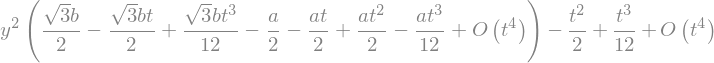

In [114]:
sp.series(y**3 * sp.re(
    simplify(f(sp.I + t * sp.exp(-sp.I * sp.pi / 6)) - f(sp.I))
).diff(t), t, 0, n=4).expand().collect(y)

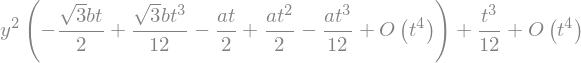

In [115]:
# The upper bound for the difference
sp.series(y**3 * sp.re(
    simplify(f(sp.I + t * sp.exp(-sp.I * sp.pi / 6)) - f(sp.I))
).diff(t) + t**2/2 + (a/2 - sp.sqrt(3) * b/2) * y**2, t, 0, n=4).expand().collect(y)

In [116]:
assert (
    sp.series(
        y**3 * sp.re(simplify(
            f(sp.I + t * sp.exp(-sp.I * sp.pi / 6)) - f(sp.I))
        ).diff(t)
        + t**2/2 + (a/2 - sp.sqrt(3) * b/2) * y**2,
        t, 0, n=6)
    .expand().collect(y)
    in sp.O(t * y**2 + t**3))
print("T.4.: assertion tested")

T.4.: assertion tested


**ASSERTION T.5.**

The Taylor expansions of $h_1(t)$, $h_2(t)$ and $h_3(t)$ at $0$ start with $-t^3/6 + \mathcal O(t^4)$,  $t/2+\mathcal{O}(t^2)$, and $\sqrt{3}t/2+\mathcal{O}(t^2)$ respectively. 

In [117]:
assert sp.series(h1, t, n=6) + t**3/6 in sp.O(t**4)
assert sp.series(h2, t, n=6) - t/2 in sp.O(t**2)
assert sp.series(h3, t, n=6) + sp.sqrt(3) * t / 2 in sp.O(t**2)
print("T.5.: assertion tested")

T.5.: assertion tested


Thank you for reading.